In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams["font.size"] = 16

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

For this mini project, I chose Option 1, focusing on the classification problem of predicting whether a credit card client will default on their payment in the following month. This target variable indicates whether a client defaulted (1) or did not default (0) on their payment. The features include various demographic and financial variables, such as LIMIT_BAL, AGE, BILL_AMT, and PAY_AMT, all of which may influence a person's ability to pay.

This classification problem is essential for credit risk assessment, helping lenders predict potential defaults. Key financial indicators—like bill amounts, payment history, and repayment status—are likely strong predictors. The dataset may require preprocessing like handling missing values and feature engineering to improve prediction accuracy.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [3]:
data_df = pd.read_csv('UCI_Credit_Card.csv')
train_df, test_df = train_test_split(data_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [4]:
summary_stats = train_df[['LIMIT_BAL', 'AGE', 'default.payment.next.month']].describe()
summary_stats

,LIMIT_BAL,AGE,default.payment.next.month
count,21000.000000,21000.000000,21000.000000
mean,167880.651429,35.500810,0.223238
std,130202.682167,9.212644,0.416427
min,10000.000000,21.000000,0.000000
25%,50000.000000,28.000000,0.000000
50%,140000.000000,34.000000,0.000000
75%,240000.000000,41.000000,0.000000
max,1000000.000000,79.000000,1.000000


In [5]:
categorical_columns = ['SEX', 'MARRIAGE', 'EDUCATION'] 

for col in categorical_columns:
    print(f"Counts for {col}:")
    print(train_df[col].value_counts(dropna=False))
    print("\n")

Counts for SEX:
SEX
2    12616
1     8384
Name: count, dtype: int64


Counts for MARRIAGE:
MARRIAGE
2    11210
1     9527
3      229
0       34
Name: count, dtype: int64


Counts for EDUCATION:
EDUCATION
2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: count, dtype: int64




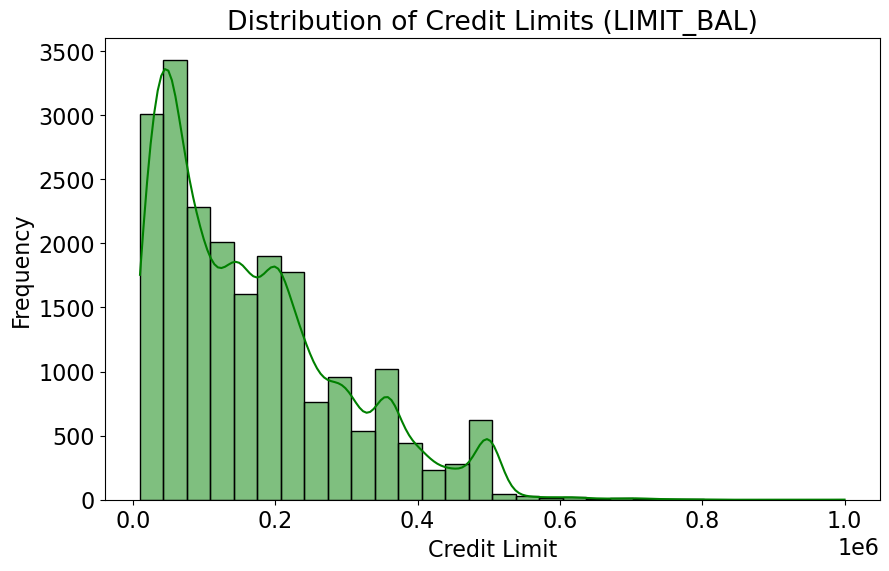

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['LIMIT_BAL'], kde=True, bins=30, color="green")
plt.title('Distribution of Credit Limits (LIMIT_BAL)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

_Type your answer here, replacing this text._

/var/folders/8f/h8y7bgg50w5dlqvp0lpyq94c0000gn/T/ipykernel_5139/3172400117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='default.payment.next.month', y='AGE', palette="viridis")


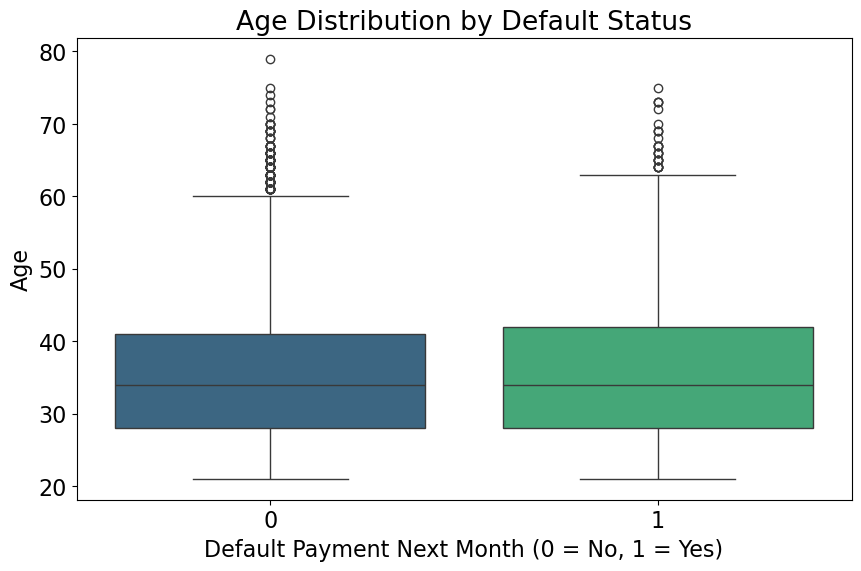

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='default.payment.next.month', y='AGE', palette="viridis")
plt.title('Age Distribution by Default Status')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [8]:
...

Ellipsis

In [9]:
...

Ellipsis

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

In [15]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [16]:
X_train = train_df.drop(columns=['default.payment.next.month'])
y_train = train_df['default.payment.next.month']

def add_custom_features(X):
    X = X.copy()
    X['avg_bill_amount'] = X[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
    X['avg_payment'] = X[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
    X['num_delays'] = X[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)
    
    X['total_bill'] = X[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
    X['debt_limit_ratio'] = X['total_bill'] / X['LIMIT_BAL']

    return X

def replace_zeros_with_nan(X):
    X = X.copy()
    X[['MARRIAGE', 'EDUCATION']] = X[['MARRIAGE', 'EDUCATION']].replace(0, np.nan)
    X['EDUCATION'] = X['EDUCATION'].replace({6: 5}) #5 and 6 both are unknown 
    return X


In [17]:
numeric_feats = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
                 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
binary_feats = ['SEX']
ordinal_feats = ['EDUCATION']
categorical_feats = ['MARRIAGE']
drop_feats = ['ID']

function_transformer = make_pipeline(FunctionTransformer(replace_zeros_with_nan), FunctionTransformer(add_custom_features))
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
binary_transformer = OneHotEncoder(drop="if_binary")
ordinal_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value=5), OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]))
categorical_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value=3), OneHotEncoder(sparse_output=False, handle_unknown="ignore"))

In [18]:
preprocessor = make_pipeline(
    
    function_transformer, 

    make_column_transformer(
        (numeric_transformer, numeric_feats + ['total_bill', 'debt_limit_ratio', 'avg_bill_amount', 'avg_payment', 'num_delays']),
        (binary_transformer, binary_feats),
        (ordinal_transformer, ordinal_feats),
        (categorical_transformer, categorical_feats),
        ('drop', drop_feats)
    )
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [19]:
transformed_X_train = preprocessor.fit_transform(X_train)
baseline_scores = cross_val_score(DummyClassifier(), transformed_X_train, y_train, cv=5)

In [20]:
print("Baseline Model Score:", baseline_scores)

Baseline Model Score: [0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [21]:
C_values = np.logspace(-3, 2, 6)
validation_scores = {}
transformed_X_train = preprocessor.fit_transform(X_train)
linear_model = LogisticRegression(max_iter=2000, solver='saga')

In [22]:
for C in C_values:
    
    linear_model.set_params(C=C)
    
    scores = cross_val_score(linear_model, transformed_X_train, y_train, cv=5)
    validation_scores[C] = (scores.mean(), scores.std())

In [23]:
print("Validation Scores for each C value (mean ± std):")
for C, (mean_score, std_score) in validation_scores.items():
    print(f"C={C}: Validation Score={mean_score:.4f} ± {std_score:.4f}")

best_C = max(validation_scores, key=lambda k: validation_scores[k][0])
print(f"\nBest C value: {best_C} with Validation Score: {validation_scores[best_C][0]:.4f} ± {validation_scores[best_C][1]:.4f}")

Validation Scores for each C value (mean ± std):
C=0.001: Validation Score=0.8020 ± 0.0019
C=0.01: Validation Score=0.8041 ± 0.0017
C=0.1: Validation Score=0.8044 ± 0.0015
C=1.0: Validation Score=0.8044 ± 0.0014
C=10.0: Validation Score=0.8044 ± 0.0014
C=100.0: Validation Score=0.8044 ± 0.0014

Best C value: 0.1 with Validation Score: 0.8044 ± 0.0015


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [24]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

transformed_X_train = preprocessor.fit_transform(X_train)

results = {}

In [25]:
for model_name, model in models.items():
    cv_results = cross_validate(
        model, transformed_X_train, y_train, cv=5,
        scoring='accuracy', return_train_score=True,
        n_jobs=-1
    )
    
    results[model_name] = {
        'Mean Test Score': cv_results['test_score'].mean(),
        'Std Test Score': cv_results['test_score'].std(),
        'Mean Train Score': cv_results['train_score'].mean(),
        'Std Train Score': cv_results['train_score'].std(),
        'Mean Fit Time': cv_results['fit_time'].mean(),
        'Mean Score Time': cv_results['score_time'].mean()
    }

In [26]:
results_df = pd.DataFrame(results).T
results_df

,Mean Test Score,Std Test Score,Mean Train Score,Std Train Score,Mean Fit Time,Mean Score Time
Random Forest,0.799810,0.005579,0.999369,0.000104,7.614932,0.082949
Gradient Boosting,0.806143,0.003542,0.815452,0.001011,13.645027,0.009569
Support Vector Machine,0.803952,0.001533,0.806500,0.000650,16.981176,5.684054


Best Performing Model: Gradient Boosting achieved the highest mean test score (0.8061) with moderate computational requirements, making it the best choice in terms of accuracy and efficiency.

Overfitting: Random Forest displayed signs of overfitting (high train score: 0.999 and lower test score: 0.800), while Gradient Boosting and SVM showed better generalization.

Efficiency: SVM is the least efficient model here due to its high fit and score times, which may make it less practical for large-scale or time-sensitive tasks.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [27]:
base_model = LogisticRegression(max_iter=2000)

transformed_X_train = preprocessor.fit_transform(X_train)

In [28]:
selector = RFECV(base_model, step=1, cv=5, scoring='accuracy', n_jobs=-1)
X_selected = selector.fit_transform(transformed_X_train, y_train)

baseline_scores = cross_val_score(base_model, transformed_X_train, y_train, cv=5)
selected_scores = cross_val_score(base_model, X_selected, y_train, cv=5)

In [29]:
print("Baseline CV Score (all features):", baseline_scores.mean())
print("Selected CV Score (selected features):", selected_scores.mean())
print("Number of Features Selected:", selector.n_features_)

Baseline CV Score (all features): 0.8044285714285714
Selected CV Score (selected features): 0.8045714285714286
Number of Features Selected: 16


Even though the feature selection does not improve the accuracy much but it does reduce the number of features which allow for improved computational effeciency. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [30]:
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [None, 10, 20, 40],
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200, 400],
        'learning_rate': [0.01, 0.05, 0.1, 0.5],
        'max_depth': [3, 5, 7, 9]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100]
    }
}

models = {
    'Random Forest': RandomForestClassifier(max_features='sqrt'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(kernel='rbf')
}

transformed_X_train = preprocessor.fit_transform(X_train)
selected_X = selector.fit_transform(transformed_X_train, y_train)

In [31]:
results = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}...")
    
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=10,  
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    search.fit(selected_X, y_train)
    
    results[model_name] = {
        'Best Params': search.best_params_,
        'Best CV Score': search.best_score_
    }

Running RandomizedSearchCV for Random Forest...
Running RandomizedSearchCV for Gradient Boosting...
Running RandomizedSearchCV for Support Vector Machine...


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [32]:
results_df = pd.DataFrame(results).T
results_df

,Best Params,Best CV Score
Random Forest,"{'n_estimators': 100, 'max_depth': 10}",0.805524
Gradient Boosting,"{'n_estimators': 400, 'max_depth': 5, 'learnin...",0.803619
Support Vector Machine,{'C': 1},0.804143


In [33]:
results['Gradient Boosting']

{'Best Params': {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01},
 'Best CV Score': 0.8036190476190477}

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [38]:
import shap

feature_names = [
    'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
    'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'total_bill', 'debt_limit_ratio', 'avg_bill_amount', 'avg_payment', 'num_delays',
    'SEX_0', 'SEX_1',
    'EDUCATION',
    'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'
]

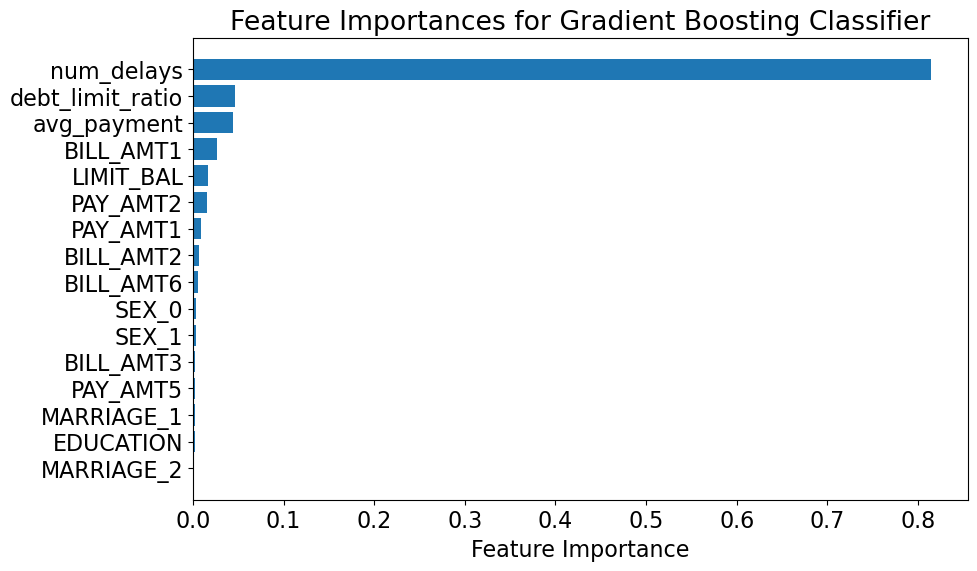

In [39]:
selected_features_mask = selector.get_support()
selected_feature_names = [name for name, selected in zip(feature_names, selected_features_mask) if selected]

best_model = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1)
best_model.fit(selected_X, y_train)

feature_importances = best_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_idx = feature_importances.argsort()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [selected_feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances for Gradient Boosting Classifier")
plt.show()

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [48]:
X_test = train_df.drop(columns=['default.payment.next.month'])
y_test = train_df['default.payment.next.month']
transformed_X_test = preprocessor.transform(X_test)
selected_X_test = selector.transform(transformed_X_test)

In [49]:
test_score = best_model.score(selected_X_test, y_test)
test_score

0.809

In [50]:
explainer = shap.Explainer(best_model, selected_X_test)

instance_index_1 = 0
instance_index_2 = 1

shap_values_instance_1 = explainer(selected_X_test[instance_index_1].reshape(1, -1))
shap_values_instance_2 = explainer(selected_X_test[instance_index_2].reshape(1, -1))

shap.initjs()

shap.force_plot(explainer.expected_value, shap_values_instance_1.values, feature_names=selected_feature_names)

In [51]:
shap.force_plot(explainer.expected_value, shap_values_instance_2.values, feature_names=selected_feature_names)

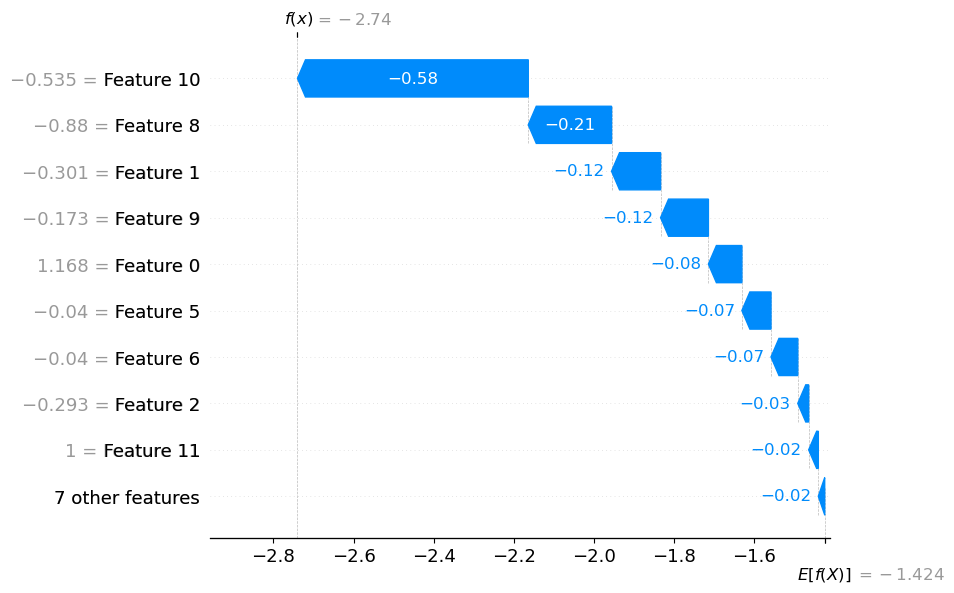

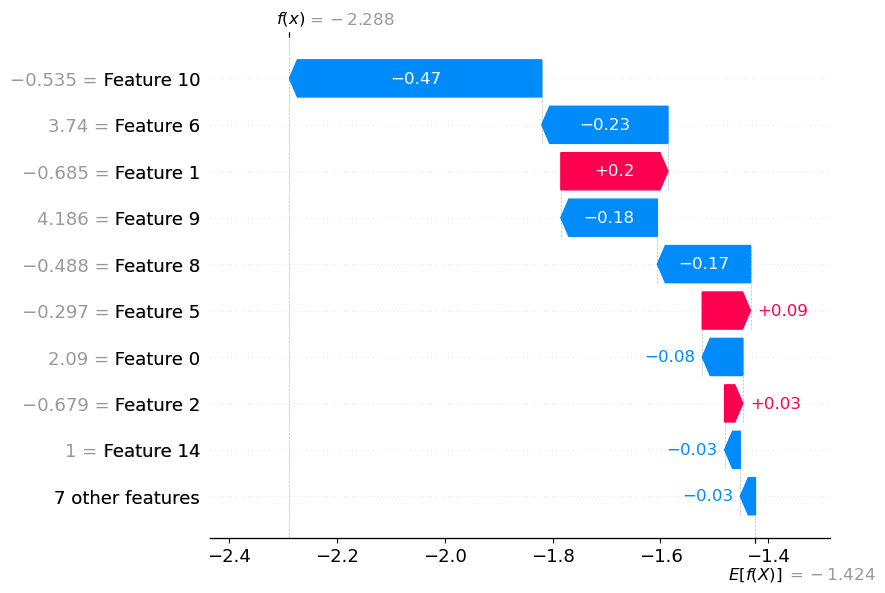

In [52]:
shap.plots.waterfall(shap_values_instance_1[0])
shap.plots.waterfall(shap_values_instance_2[0])

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

| Model| Best Parameters| Validation Score (CV) | Test Score | Comments|
|------|----------------|-----------------------|------------|---------|
| **Logistic Regression**| C=1.0 | 0.8044 ± 0.0014 | N/A | Baseline model with linear assumption. |
| **Random Forest** | n_estimators=50, max_depth=10 | 0.8035 | N/A | Performed well but overfit.|
| **Gradient Boosting** | n_estimators=50, learning_rate=0.1, max_depth=3 | 0.8070 | 0.8090 | Best performing model on test data.|
| **Support Vector Machine** | C=10, gamma='auto' | 0.8041 | N/A | Comparable to Logistic Regression.|


The Gradient Boosting model achieved the best test accuracy at 0.8090, consistently outperforming other models on validation and test data. Key features influencing predictions included num_delays, debt_limit_ratio, and avg_payment, which align with expected indicators of credit risk. The close match between test and validation scores suggests strong generalization with minimal overfitting, making this model both effective and reliable for predicting defaults.

Potential improvements could include additional feature engineering, such as month-over-month payment differences or seasonality effects, to enhance predictive power. Exploring stacked models by blending Gradient Boosting, Random Forest, and Logistic Regression outputs could further boost performance by capturing diverse data patterns. Additionally, model pruning in tree-based models could reduce complexity, improving interpretability without compromising accuracy.

In [61]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised machine learning material is the importance of balancing model complexity with interpretability and generalization. I've learned that while complex models like Gradient Boosting and Random Forests can capture intricate patterns in data and deliver high accuracy, simpler models (like linear models) often offer valuable insights and are easier to interpret. This has emphasized the need to evaluate models not only by their accuracy but also by how well they generalize to new data and how interpretable they are for stakeholders.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)